<div style="border:solid green 2px; padding: 20px">
<b>Привет,Георгий!</b>

Меня зовут Лутченкова Екатерина, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — помочь тебе разобраться в материале, поделиться своим опытом и помочь тебе стать крутым специалистом.

Ниже ты найдешь мои комментарии, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». **Пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки я не смогу принять твой проект. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 

Было бы здорово, если бы здесь было оглавление. 
    
Возможность использовать стандартное автособираемое оглавление есть не всегда, а хорошее оглавление делает работу чуткой и структурированной.
</div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

# чтобы не было предупреждений
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
# data = pd.read_csv(r"C:\Users\George\Мой диск\3 Практикум\2 Проекты\12 Временные ряды\taxi.csv", index_col=[0], parse_dates=[0])

display(data)

print(f'Проверка монотонности индекса - {data.index.is_monotonic}')

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Проверка монотонности индекса - True


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Молодец, что столбец `datetime` сразу читаешь в формате даты и в качестве индекса.
</div>

## Анализ

In [3]:
data_copy = data.copy()

In [4]:
data_copy_rolling = data_copy.resample('1H').sum()
data_copy_decompose = data_copy.resample('1H').sum()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Верно, ресемплирование по часу здесь самое подходящее. А еще хорошо, что ты берешь сумму, это наиболее правильно в плане интерпретации.
</div>

<AxesSubplot:title={'center':'Количество заказов и среднее распределение'}, xlabel='datetime'>

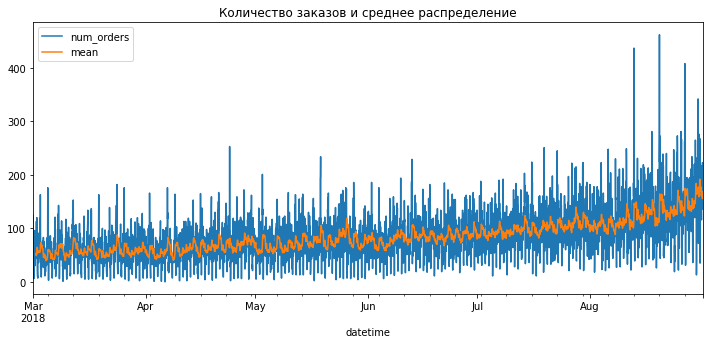

In [5]:
data_copy_rolling['mean'] = data_copy_rolling['num_orders'].rolling(20).mean()
data_copy_rolling.plot(figsize=(12, 5), title = 'Количество заказов и среднее распределение')

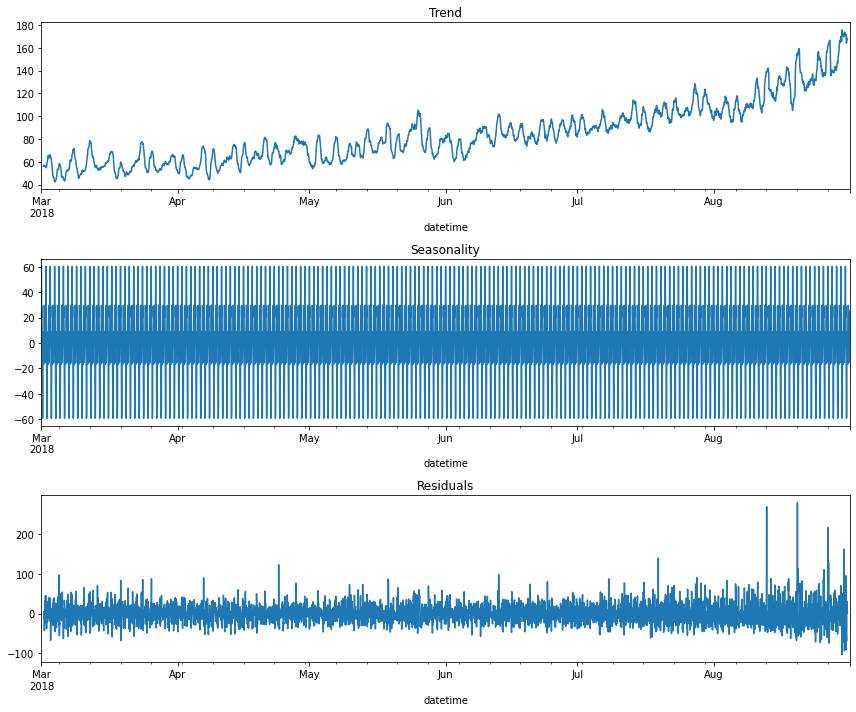

In [6]:
decomposed = seasonal_decompose(data_copy_decompose)

plt.figure(figsize=(12, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

Ничего не понятно, поэтому возьмём за месяц, неделю и день

In [7]:
data_per_month = data_copy['2018-03' : '2018-04'].resample('1H').sum()
data_per_week = data_copy['2018-03-04' : '2018-03-11'].resample('1H').sum()
data_per_day = data_copy['2018-05-20' : '2018-05-21'].resample('1H').sum()

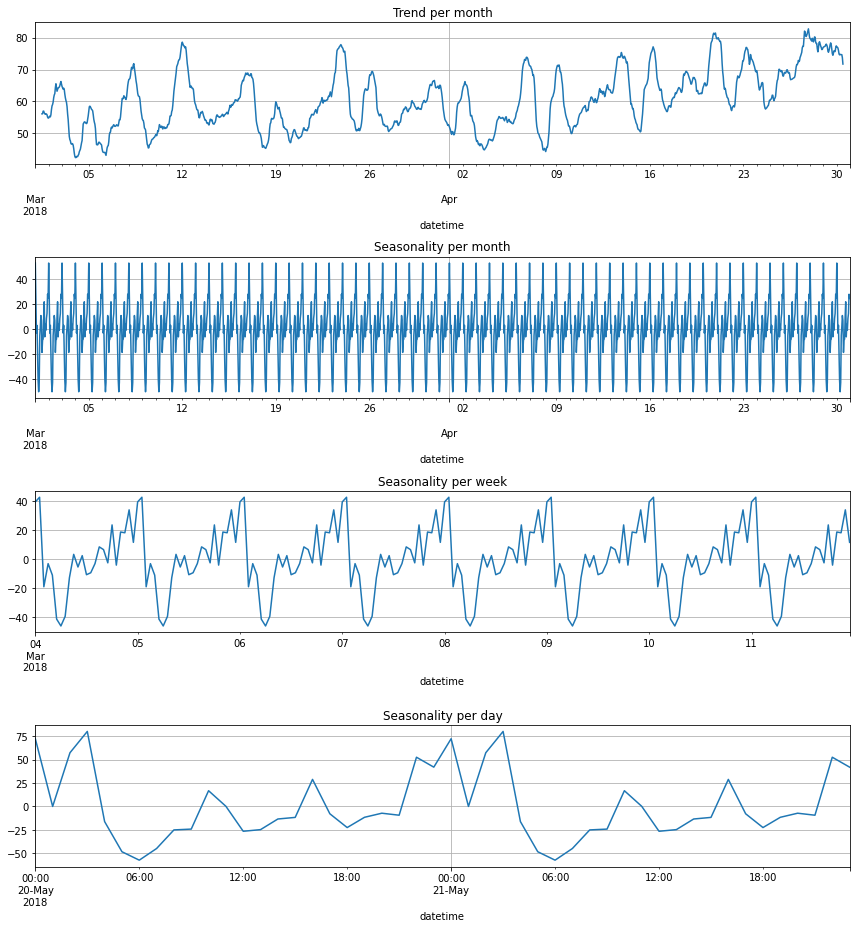

In [8]:
decomposed_per_month = seasonal_decompose(data_per_month)
decomposed_per_week = seasonal_decompose(data_per_week)
decomposed_per_day = seasonal_decompose(data_per_day)

plt.figure(figsize=(12, 13))
plt.subplot(411)
decomposed_per_month.trend.plot(ax=plt.gca())
plt.title('Trend per month')
plt.grid()

plt.subplot(412)
decomposed_per_month.seasonal.plot(ax=plt.gca())
plt.title('Seasonality per month')
plt.grid()

plt.subplot(413)
decomposed_per_week.seasonal.plot(ax=plt.gca())
plt.title('Seasonality per week')
plt.grid()

plt.subplot(414)
decomposed_per_day.seasonal.plot(ax=plt.gca())
plt.title('Seasonality per day')
plt.grid()

plt.tight_layout()

**Вывод**

- Видно, что среднее значение как и колличество заказов увеличивается
- Видна сезонность по утрам и в районе 16-17 часов. Но ещё пики около 12 часов, а потом спад.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Да, верно. В данных присутствует и тренд и сезонность. Молодец, что рассмотрел сезонность на более коротком промежутке и заметил сезонность внутри суток.
    
Здесь еще можно убедиться, что наш ряд стационарный. Для этого можно провести тест Дики — Фуллера. Подробнее можно почитать [здесь](https://habr.com/ru/post/540868/).
</div>

## Обучение

In [9]:
data_learning = data_copy.resample('1H').sum()

In [10]:
# Напишем функцию для создания признаков
def make_features(data, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Все данные за 2018 год, поэтому выделять отдельно год не имеет смысла, этот признак будет равен константе. Месяц выделить можно, но это тоже довольно бесполезный признак, так как данные у нас всего за пол года, а дальше предсказывать придется осень.
    
А вот час, как раз таки, нужно выделить в отдельный признак, так как, в задании просят предсказывать данные на следующий час.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Исправил
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Твой код не работает в режиме Run-All. Ты пытаешься вывести переменные, которые еще не були созданы. 
    
Перед отправкой проекта рекоммендую запустить проект заново от начала до конца и убедиться, что весь код работает (`Kernel -> Restart & Run All`).

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Хочу тебе напомнить графический метод подбора параметров max_lag и rolling_mean_size.
     
Чтобы оценить количество лагов, можно построить график частной автокорреляционной функции\
А для того, чтобы оценить порядок скользящего среднего, построить график автокорреляционной функции. Нам нужен тот параметр, после которого значения функции равны или близки к нулю.\
Подходить может много вариантов, но выбор слишком больших параметров усложнит модель.
    
```python
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(ts, alpha=None).set_size_inches(12, 4)
plt.show()

plot_acf(ts, alpha=None).set_size_inches(12, 4)
plt.show()
```
https://habr.com/ru/post/207160/
</div>

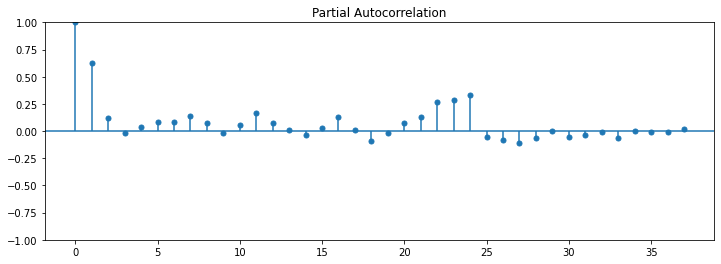

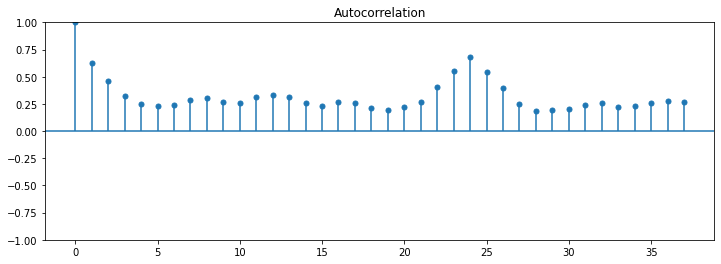

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(data_learning, alpha=None).set_size_inches(12, 4)
plt.show()

plot_acf(data_learning, alpha=None).set_size_inches(12, 4)
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Я посмотрел документацию, но до конца не понял, что мне нужно делать с этими данными. Какие значение стоит брать.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>

Эти графики позволяют лучше понять структуру данных и предположить, какие значения для лагов и скользящего среднего лучше использовать. 
    
Нам нажно найти такие значения, после которых все палочки на графике становятся близкими к нолю. По верхнему графику видно, что после 24 все лаги близки к нолю, поэтому я бы предложила использовать 24 лага. Это и видно на графике сезонности, который мы построили выше.
    
По нижнему графику все не так однозначно, оптимального размера окна скользящего среднего я не вижу, все палочки довольно высокие. Поэтому здесь можно взять любые значения, я бы предложила что-то около 25-30, чтобы и не сильно мало, и не сильно много.
    
Эти графики просто вспомогательные, в каких-то других задачах они будут явно указывать на необходимые значения параметров. А в каких-то нет, и придется подбирать параметры другим способом.
</div>

In [12]:
make_features(data_learning, 24, 28)

<div class="alert alert-info"> <b>Комментарий студента v2:</b> 
    Исправил
</div>

In [13]:
# Создадим обучающую и тестовую выборки
train, test = train_test_split(data_learning, shuffle=False, test_size=0.1)

train = train.dropna()

features_train = train.drop('num_orders', axis=1)
features_test = test.drop('num_orders', axis=1)

target_train = train['num_orders']
target_test = test['num_orders']

In [14]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3946, 28)
(442, 28)
(3946,)
(442,)


### Линейная регрессия

In [15]:
# Воспользуемся линейной регрессией
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

tscv = TimeSeriesSplit(n_splits=10)
cross_val_score(model_lr, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

-26.267238564463298

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Если тестировать модель на обучающей выборке - большой риск не заметить переобучение, что видно по результатам на тестовой выборке.
Здесь можно использовать валидационную выборку, но лучше тестировать модель с помощью кросс-валидации, такая оценка получается более "честной". Оставлю ссылку: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    
Также не забудь, что в случае с временным рядом нам нужно задать кросс-валидацию TimeSeriesSplit\
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html \
Если мы исследуем временной ряд, то в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.\
Иллюстрация работы:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

Сделать это можно примерно так:
```python
tscv = TimeSeriesSplit(n_splits=10)
cross_val_score(model, X, y, cv=tscv)
```
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Сделал валидационную выборку, также сделал кросс-валидацию TimeSeriesSplit, но, буду честен, не понимаю что делать с результатом (полученный array-массив)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
    
Все правильно, значения полученного массива усредняются и мы получаем среднюю оценку на кросс-валидации.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2 (исправлено):</b> 

В функцию cross_val_score необходимо задать метрику, которую она будет считать. По умолчанию используется R2, а нам нужно RMSE: scoring='neg_root_mean_squared_error'.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2 (исправлено):</b> 

Когда мы используем кросс-валидацию, то выделять валидационную выборку не стоит. В модель попадает меньше данных и она может хуже обучиться. Это поможет тебе улучшить качество твоих моделей.

<div class="alert alert-info"> 
<b>Комментарий студента v2:</b> 
Убрал валидационную выборку, потому что использую cross_val_score
</div>

### Дерево решений

    %%time

    # найдём лучшие гиперпараметры
    model = DecisionTreeRegressor()

    parametrs = { 'max_depth': range(1, 11),
                  'min_samples_leaf': range(1, 11),
                  'min_samples_split': range(2, 11) }

    tscv = TimeSeriesSplit(n_splits=10)
    grid = GridSearchCV(estimator=model, cv=tscv, param_grid=parametrs)
    grid.fit(features_train, target_train)

    grid.best_params_

In [16]:
# подставим найденные гиперпараметры
model_dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=2, random_state=12345)
model_dt.fit(features_train, target_train)

cross_val_score(model_dt, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

-27.678437512002688

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>

Отлично, используем GridSearchCV.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2 (исправлено):</b> 

По умолчанию в GridSearchCV используется обычная кросс-валидация, которая перемешивает данные, а нам нужно сохранить структуру, как я написала ранее. Здесь тоже нужно использовать разбивку TimeSeriesSplit:
    
```python
tscv = TimeSeriesSplit(n_splits=10)
grid = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
grid.fit(X, y)
```
    
cross_val_score дальше можно не использовать, а просто вывести grid.best_score_, чтобы получить оценку на кросс-валидации. Также не забудь задать правильный параметр scoring='neg_root_mean_squared_error'.
    
Везде ниже тоже нужно это учесть.
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> 
    Исправил
</div>

### Случайный лес

Сделал подбор гиперпараметров с помощью GridSearchCV, заняло 53 минуты. 

```python
%%time

model = RandomForestRegressor()

parametrs = { 'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 11, 2) }

tscv = TimeSeriesSplit(n_splits=10)
grid = GridSearchCV(estimator=model, cv=tscv, param_grid=parametrs)
grid.fit(features_train, target_train)

grid.best_params_
```
Результат был следующим: `n_estimators=50, max_depth=11, min_samples_leaf=2, min_samples_split=4`

In [17]:
model_rf = RandomForestRegressor(n_estimators=50, max_depth=11, min_samples_leaf=2, min_samples_split=4, random_state=12345)

model_rf.fit(features_train, target_train)

cross_val_score(model_rf, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()

-24.28771883610649

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Нельзя подбирать гиперпараметры по обучающей выборке, это грубейшая ошибка, которая ведет к переобучению.
Если ты подбираешь гиперпараметры в цикле, необходимо выделять валидационную выборку или использовать кросс-валидацию. В нашем случае удобнее использовать кросс-валидацию с поиском гиперпараметров по сетке: Вот [ссылка](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv).
    
Также не забудь, что здесь тоже следует использовать разбивку TimeSeriesSplit.
    
</div>

## Тестирование

In [42]:
prediction = model_rf.predict(features_test)
print("RMSE тестовой выборки:", mean_squared_error(target_test, prediction)**0.5)

RMSE тестовой выборки: 42.90459008311443


Построим график реальных и предсказанных результатов

<AxesSubplot:xlabel='datetime'>

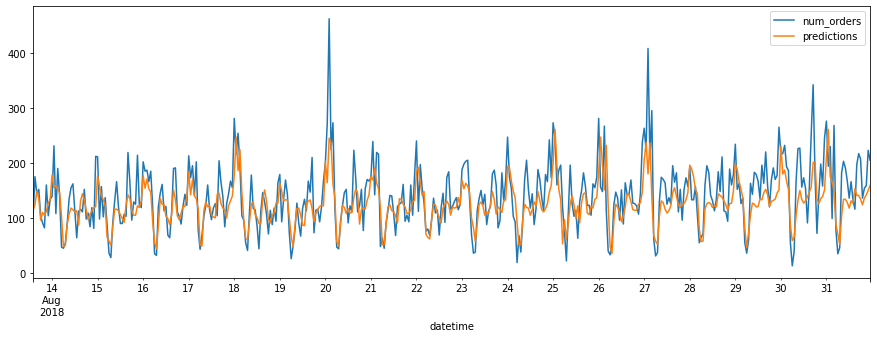

In [47]:
true = pd.DataFrame(target_test.copy())
prediction = pd.DataFrame(data=prediction, index=target_test.index.copy(), columns=['predictions'])
data_plot = true.join(prediction)
data_plot['predictions'] = data_plot['predictions'].astype('int64')
data_plot.plot(figsize=(15,5))

Возьмём за два дня

<AxesSubplot:xlabel='datetime'>

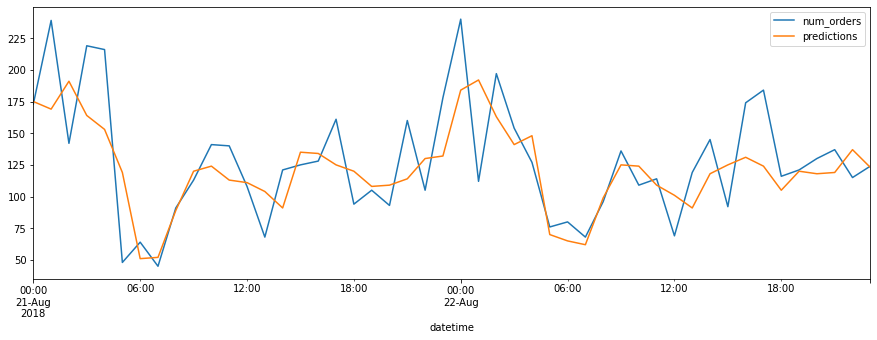

In [50]:
data_plot['2018-08-21' : '2018-08-22'].plot(figsize=(15,5))

## Вывод

- Я загрузил данные и столбец `datetime` сразу прочитал в формате даты и в качестве индекса
- Сделал ресемплирование по часу и проанализировал тренд и сезонность месяца, недели и дня.
- Сделал создал графики для нахождения лучших параметров для max_lag и rolling_mean_size в функции создания признаков.
- Создал 3 модели и для 2-ух подобрал параметры через GridSearchCV
- С помощью лучшей модели сделал предсказания и добился результата RMSE меньше 48, а именно 42,9.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 
    
Давай тут еще построим график с реальным и предсказанным значением тестовой выборки. Интересно, как все это дело выглядит. 

График нужен типо такого: https://www.pvsm.ru/images/2017/04/24/otkrytyi-kurs-mashinnogo-obucheniya-tema-9-analiz-vremennyh-ryadov-s-pomoshyu-Python-61.png
    
На одном графике две линии: реальный временной ряд из тестовой выборки и предсказанный временной ряд из тестовой выборки

Как ты думаешь, какие результаты можно считать приемлемыми? Ты построил так много классных моделей, обучил их, получил довольно низкие значения RMSE. Но что, если константное предсказание результат лучше, чем твоя модель? Давай посчитаем значение метрики на любой простейшей модели (на твой выбор - среднее, предыдущее, DummyRegressor) и оценим результат.  
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Я взял несколько других моделей, подобрал параметры с помощью GridSearchCV и обучил их. Но всё равно получил низкие значения RMSE. Не понимаю, как лучше сделать
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>

Выше я написала тебе несколько советов, которые помогут тебе превзойти необходимое качество на тестовой выборке. Уверена, у тебя все получится. Если есть какие-то вопросы - пиши, будем разбираться вместе. 
    
Удачи!
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> 
    Удалил валидационную выборку и делал всё через кросс-валидацию. Самая лучшая модель это случайный лес. Её и использовал на тестовой выборке. Цель была достигнуть результата меньше 48, у меня получилось 42.9. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>

Супер, необходимого качества достигли.
</div>

<div style="border:solid green 2px; padding: 20px"><div style="border:solid green 2px; padding: 20px"><div style="border:solid green 2px; padding: 20px">

Все комментарии исправлены, поэтому я могу зачесть твою работу. 👍
    
Если у тебя еще есть какие-то вопросы, ты можешь обратиться к наставнику, мы всегда готовы прийти тебе на помощь. И желаю тебе удачи в освоении следующих тем :)

<div style="border:solid green 2px; padding: 20px"><div style="border:solid green 2px; padding: 20px">
    
Георгий, ты большой молодец, ты хорошо постарался над исправлением моих комментариев. 
    
Осталось построить график с прогнозом и сравнить качество твоей модели с константным предсказанием, чтобы раздел с тестированием стал полноценным. Уверена, это не займет много времени. 
    
Буду ждать твою работу, мы уже на финишной прямой :)

<div style="border:solid green 2px; padding: 20px">
    
Спасибо за твою работу, основные шаги выполнены.
    
Мне понравился твой раздел с первоначальным анализом, молодец, что заметил наличие тренда и сезонности.
    
В разделе с обучением моделей еще есть над чем поработать: пока тебе не удалось достичь необходимого качества модели, но мы движемся в верном направлении :)
    
Есть несколько доработок, без выполнения которых я не смогу принять твой проект:
    
    1. Подумать над выделением признаков;
    
    2. Правильно оценить качество моделей;
    
    3. Построить график с прогнозом;
    
    4. Сравнить твой результат с простейшим предсказанием;
    
    5. Написать финальные выводы;
    
    
Буду ждать твою работу на повторное ревью. Если у тебя есть какие-то вопросы, буду рада на них ответить 🙂

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48